<a href="https://colab.research.google.com/github/vivekkum-ar/Learn-In-IPYNB/blob/main/Cricket_Player_dataAnyls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [46]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1L557fYIamPPThR70vXNHz8ht_MaVMJL8oBhMP9Vfqbw/export?format=csv")

In [47]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [48]:
#Solution Question-1 
def runs_to_int(val):
  return int(val.replace("*",""))

df.Runs = df.Runs.apply(runs_to_int)
df.Runs.describe()[5] - df.Runs.describe()[4] #50th percentile is at 6th position #25th percentile is at 5th position 

22.5

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

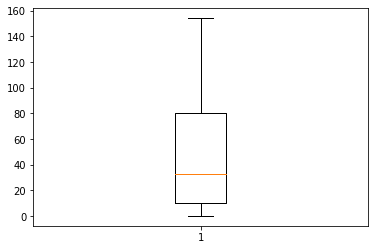

In [49]:
#Solution Question-2
#upper fence means maximum value 
plt.boxplot(df.Runs)
df.Runs.describe()

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [50]:
#Solution Question-3
df['year'] = pd.to_datetime(df['Start Date']).dt.year #making a new coloum for year as YYYY
#verifying I as given in question
df.groupby('year').Runs.count() #this is how to apply count() pivot on year

year
2008     5
2009     6
2010    16
2011    31
2012    11
2013    23
2014    17
2015    10
2016    10
2017     3
Name: Runs, dtype: int64

In [51]:
#Solution Question-3
#verifying II & partly III as given in question
df.groupby('year').Runs.mean() #this is how to apply sum pivot on year
#df['Runs'][df['year']==2017].describe()

year
2008    31.800000
2009    38.333333
2010    45.375000
2011    42.000000
2012    40.363636
2013    47.826087
2014    58.529412
2015    30.400000
2016    73.900000
2017    61.666667
Name: Runs, dtype: float64

In [52]:
#Solution Question-3
#verifying III as given in question
df[df.Runs == df.Runs.max()] # detail of maximum runs scored

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,year
126,154,202,134,16,1,114.92,3,not out,2,v New Zealand,Mohali,23-Oct-16,2016


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(array([28., 13., 12.,  9.,  6.,  6.,  9.,  4.,  9., 11.,  4.,  6.,  3.,
         2.,  4.]),
 array([  1. ,  14.4,  27.8,  41.2,  54.6,  68. ,  81.4,  94.8, 108.2,
        121.6, 135. , 148.4, 161.8, 175.2, 188.6, 202. ]),
 <a list of 15 Patch objects>)

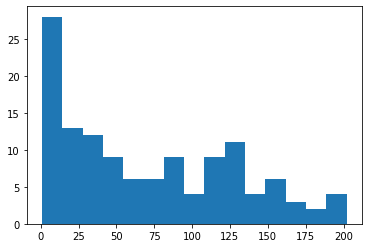

In [85]:
#Solution Question-4
df2 = df[~(df['Mins']== "-")]
df2['Mins'] = df2['Mins'].apply(lambda x: int(x))
plt.hist(df2.Mins, bins=15)